# Relatorio Python

O que o código faz:


Pega os dados;

Trata os dados;

Faz as contas e gera as imagens;

Informações que iremos pegar:

Bitcoin e Ethereum

Dólar

Inflação

Selic


Passo a passo:

Pegar dados do Bitcoin & Ethereum no yahoo finance.
     - Calcular fechamento do dia, retorno no ano, retorno no mês, volatilidade 12m, retorno mês a mês e plotar gráfico do ativo. 
Pegar dados do dólar, inflação e selic no banco central. (3 linhas de código)
O ideal é rodar o programa na parte da manhã, sempre.

In [1]:
!pip install html5lib
!pip install webdriver-manager
!pip install python-bcb
!pip install pandas-datareader
!pip install mplfinance
!pip install selenium
!pip install FPDF
!pip install mplcyberpunk
!pip install python-dotenv
!pip install pywin32

ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings('ignore')

# Dados Bitcoin (USD) & Ethereum (USD)

In [171]:
indices = ['BTC-USD','ETH-USD'] # Lista com os nomes dos ativos

hoje = datetime.now() # Dia de Hoje
um_ano_atras = hoje - timedelta (days = 366) # 366 - 1 para ter o intervalo de tempo

# Pegando dados do Yahoo Finance
dados_mercado = pdr.get_data_yahoo (indices, start = um_ano_atras, end = hoje)

dados_mercado

Attributes     Adj Close                      Close               \
Symbols          BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2021-10-21  62210.171875  4054.322754  62210.171875  4054.322754   
2021-10-22  60692.265625  3970.181885  60692.265625  3970.181885   
2021-10-23  61393.617188  4171.663574  61393.617188  4171.663574   
2021-10-24  60930.835938  4087.903076  60930.835938  4087.903076   
2021-10-25  63039.824219  4217.876953  63039.824219  4217.876953   
...                  ...          ...           ...          ...   
2022-10-18  19334.416016  1310.447021  19334.416016  1310.447021   
2022-10-19  19139.535156  1285.744263  19139.535156  1285.744263   
2022-10-20  19053.740234  1283.200928  19053.740234  1283.200928   
2022-10-21  19172.468750  1299.946411  19172.468750  1299.946411   
2022-10-22  19178.953125  1311.947510  19178.953125  1311.947510   

Attributes          High                        Low               \
Symbols          BTC-USD      ETH-USD       BTC-USD      ETH-USD   
Date                                                               
2021-10-21  66600.546875  4366.088379  62117.410156  4032.483887   
2021-10-22  63715.023438  4162.975586  60122.796875  3908.340332   
2021-10-23  61743.878906  4171.663574  59826.523438  3944.631836   
2021-10-24  61505.804688  4185.729492  59643.343750  3967.120361   
2021-10-25  63729.324219  4236.666992  60691.800781  4072.034668   
...                  ...          ...           ...          ...   
2022-10-18  19666.994141  1339.085938  19144.769531  1291.660645   
2022-10-19  19348.416016  1312.442383  19127.687500  1283.965332   
2022-10-20  19315.199219  1307.855103  18971.458984  1275.323975   
2022-10-21  19237.384766  1305.081299  18770.970703  1260.666748   
2022-10-22  19244.792969  1316.610107  19134.070312  1296.153809   

Attributes          Open                    Volume               
Symbols          BTC-USD      ETH-USD      BTC-USD      ETH-USD  
Date                                                             
2021-10-21  66002.234375  4161.713379  45908121370  28220661820  
2021-10-22  62237.890625  4055.686523  38434082775  19432937968  
2021-10-23  60694.628906  3971.356445  26882546034  14781537792  
2021-10-24  61368.343750  4171.855957  27316183882  14978083638  
2021-10-25  60893.925781  4084.425781  31064911614  15995727040  
...                  ...          ...          ...          ...  
2022-10-18  19550.466797  1331.669922  30580012344  10416747806  
2022-10-19  19335.027344  1310.563110  22425387184   8350692785  
2022-10-20  19138.085938  1285.660278  24493974420   9009111996  
2022-10-21  19053.203125  1283.188110  32459287866  10412565245  
2022-10-22  19175.806641  1300.216309  18234808320   7478705664  

[367 rows x 12 columns]

In [11]:
# Pegando o fechamento de cada ativo para calcular a rentabilidade

# Atribuindo a coluna adj close a varial dados fechamento
dados_fechamento = dados_mercado ['Adj Close']

dados_fechamento.columns = ['Bitcoin','Ethereum'] # Redefinindo nomes das colunas
dados_fechamento = dados_fechamento.dropna() # Excluindo valores Nulos

dados_fechamento

,Bitcoin,Ethereum
Date,,
2021-10-20,65992.835938,4155.992188
2021-10-21,62210.171875,4054.322754
2021-10-22,60692.265625,3970.181885
2021-10-23,61393.617188,4171.663574
2021-10-24,60930.835938,4087.903076
...,...,...
2022-10-17,19550.757812,1331.713623
2022-10-18,19334.416016,1310.447021
2022-10-19,19139.535156,1285.744263


In [13]:
# Pegando fechamento mensal e anual de cada ativo para calcular rentabilidade

# Pegando o fechamento (Ultimo registro) dos ultimos anos
dados_anuais = dados_fechamento.resample ('Y').last() 

# Pegando o fechamento (Ultimo registro) de cada mes
dados_mensais = dados_fechamento.resample ('M').last() 

display (dados_anuais)
display (dados_mensais)

,Bitcoin,Ethereum
Date,,
2021-12-31,46306.445312,3682.632812
2022-12-31,19173.710938,1298.094238


,Bitcoin,Ethereum
Date,,
2021-10-31,61318.957031,4288.074219
2021-11-30,57005.425781,4631.479004
2021-12-31,46306.445312,3682.632812
2022-01-31,38483.125000,2688.278809
2022-02-28,43193.234375,2919.201172
2022-03-31,45538.675781,3281.642822
2022-04-30,37714.875000,2730.186768
2022-05-31,31792.310547,1942.328003
2022-06-30,19784.726562,1067.298828


In [16]:
# Calculando a rentabilidade de cada ativo
# Ferramenta .iloc [1:,:] -> 1 representa a linha e : coluna.

retorno_diario = dados_fechamento.pct_change().dropna()
display(retorno_diario)

retorno_mes_a_mes = dados_mensais.pct_change().dropna()
retorno_mes_a_mes = retorno_mes_a_mes.iloc[1: , :] # Excluindo os dados do mes 10 de 2021
display(retorno_mes_a_mes)

retorno_no_ano = dados_anuais.pct_change().dropna()
display (retorno_no_ano)

,Bitcoin,Ethereum
Date,,
2021-10-21,-0.057319,-0.024463
2021-10-22,-0.024400,-0.020753
2021-10-23,0.011556,0.050749
2021-10-24,-0.007538,-0.020078
2021-10-25,0.034613,0.031795
...,...,...
2022-10-17,0.014670,0.019457
2022-10-18,-0.011066,-0.015969
2022-10-19,-0.010079,-0.018851


,Bitcoin,Ethereum
Date,,
2021-12-31,-0.187684,-0.204869
2022-01-31,-0.168947,-0.270012
2022-02-28,0.122394,0.085900
2022-03-31,0.054301,0.124158
2022-04-30,-0.171806,-0.168043
2022-05-31,-0.157035,-0.288573
2022-06-30,-0.377688,-0.450505
2022-07-31,0.179541,0.575489
2022-08-31,-0.140856,-0.076022


,Bitcoin,Ethereum
Date,,
2022-12-31,-0.585939,-0.647509


In [17]:
# Fechamento do dia
fechamento_de_dia = retorno_diario.iloc[-1, :]
display(fechamento_de_dia)

Bitcoin     0.006296
Ethereum    0.011606
Name: 2022-10-21 00:00:00, dtype: float64

In [18]:
# Volatilidade Bitcoin e Ethereum (Desvio padrão)
'''
std calcula o desvio padrao:
para o calculo da volatilidade precisamos do desvio padrão * raiz de 252
'''
volatilidade_12m_bitcoin = retorno_diario ['Bitcoin'].std()*np.sqrt(252)
volatilidade_12m_ethereum = retorno_diario ['Ethereum'].std()*np.sqrt(252)

display(volatilidade_12m_bitcoin)
display(volatilidade_12m_ethereum)

0.5311112951630474

0.6927150252227884

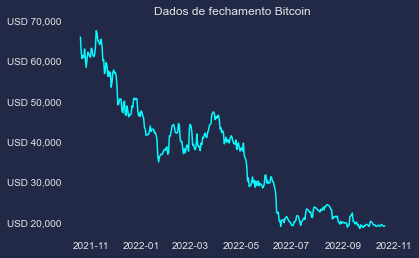

In [129]:
# Plotando Gráfico -> Dados fechamento Bitcoin
fig,ax = plt.subplots()
plt.style.use('cyberpunk')

# eixo X (dados_fechamento.index) -> Dias
# eixo Y (dados_fechamento ['Bitcoin']) -> Dados das colunas
ax.plot(dados_fechamento.index,dados_fechamento ['Bitcoin'])
ax.yaxis.set_major_formatter('USD {x:1,.0f}')
ax.grid (False) # Excluindo linhas do fundo
plt.title ('Dados de fechamento Bitcoin')
plt.savefig ('Bitcoin.png',dpi = 300) # Salvando grático e dpi 300 e a melhor qualidade possivel

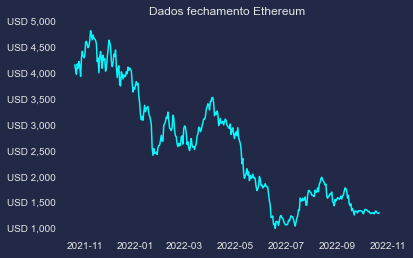

In [126]:
# Plotando Gráico -> Dados fechamento Ethereum
fig,ax = plt.subplots()
plt.style.use ('cyberpunk')

ax.plot(dados_fechamento.index,dados_fechamento['Ethereum'])
ax.yaxis.set_major_formatter('USD {x:1,.0f}')
ax.grid (False)
plt.title ('Dados fechamento Ethereum')
plt.savefig ('Ethereum.png',dpi = 300)

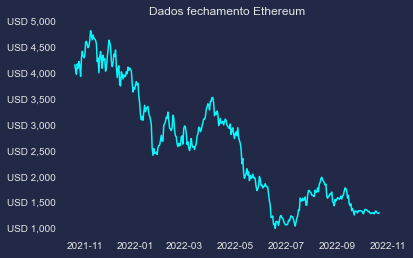

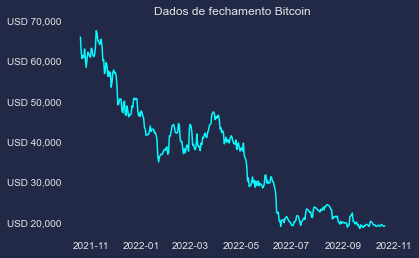

In [124]:
# Plotando Gráico -> Dados fechamento Ethereum
fig,ax = plt.subplots()
plt.style.use ('cyberpunk')
ax.plot(dados_fechamento.index,dados_fechamento['Ethereum'])
ax.yaxis.set_major_formatter('USD {x:1,.0f}')
ax.grid (False)
plt.title ('Dados fechamento Ethereum')

# Plotando Gráfico -> Dados fechamento Bitcoin
fig,ax = plt.subplots()
plt.style.use('cyberpunk')
ax.plot(dados_fechamento.index,dados_fechamento ['Bitcoin'])
ax.yaxis.set_major_formatter('USD {x:1,.0f}')
ax.grid (False)
plt.title ('Dados de fechamento Bitcoin');

# Dados do Banco Central (Selic, Inflação e Dólar)
https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries -> Link para localizar series

https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json -> Api serie de dados

In [68]:
# Serie Selic

# 432 se refere ao codigo da selic, direto do localizador do banco central
# Puxando dados apartir do primeiro dia de 2010
selic = sgs.get({'selic': 432}, start = '2010-01-01')
selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2022-10-17,13.75
2022-10-18,13.75
2022-10-19,13.75


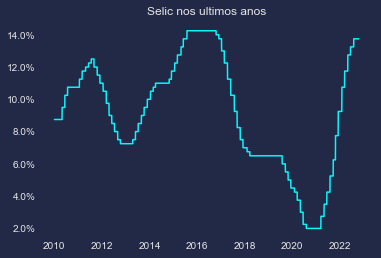

In [74]:
# Plotando Gráfico
fig,ax = plt.subplots()
plt.style.use ('cyberpunk')

ax.plot (selic.index,selic['selic']) # Plotando com dados da selic
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # Formatando o eixo y para porcentagem
plt.title ('Selic nos ultimos anos') # Definindo titulo
ax.grid(False)

plt.show()

In [76]:
# Série do IPCA e IGP - M
inflacao = sgs.get ({'ipca':433,'igp-m':189},start = um_ano_atras + timedelta(180)) # 6 meses

inflacao

,ipca,igp-m
Date,,
2022-04-01,1.06,1.41
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59
2022-07-01,-0.68,0.21
2022-08-01,-0.36,-0.70
2022-09-01,-0.29,-0.95


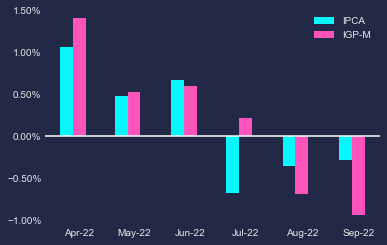

In [170]:
# Plotando Gráfico
datas_numericas = date2num(inflacao.index) # Transformando data em ini (numeros)

fig,ax = plt.subplots()
plt.style.use ('cyberpunk')

# Plotando o Gráfico
plt.title ('')
p1 = ax.bar(datas_numericas-7, inflacao['ipca'], label = "IPCA", width=7) #-7 representa o espaçamento
p2 = ax.bar(datas_numericas,inflacao['igp-m'], label = 'IGP-M', width=7)
#ax.bar_label(p1, padding=3, size = 8)
#ax.bar_label(p2, padding=3)
#ax.bar_label(p1, label_type='edge')
#ax.bar_label(p2, label_type='edge')

plt.legend() # Adicionando a legenda (IPCA E IGP-M declarados no label)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())# Formatando o eixo Y para porcentagem

# Formatando o eixo X para que fique os as inicias dos meses junto com o ano
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)

ax.grid (False)
plt.axhline (y = 0, color = 'w') # Trançando linha no eixo 0


# Salvando
plt.savefig('inflacao.png',dpi = 300)
plt.show()

In [131]:
# Importando Moedas (USD)
dolar = currency.get('USD',start= um_ano_atras, end= datetime.now())
dolar

,USD
Date,
2021-10-20,5.5571
2021-10-21,5.6423
2021-10-22,5.7117
2021-10-25,5.5973
2021-10-26,5.5800
...,...
2022-10-17,5.2713
2022-10-18,5.2697
2022-10-19,5.2808


In [132]:
# Puxando mes e ano

dolar_mensal = dolar.resample('M').last()
dolar_anual = dolar.resample('Y').last()

display(dolar_mensal)
display(dolar_anual)

,USD
Date,
2021-10-31,5.6430
2021-11-30,5.6199
2021-12-31,5.5805
2022-01-31,5.3574
2022-02-28,5.1394
2022-03-31,4.7378
2022-04-30,4.9191
2022-05-31,4.7289
2022-06-30,5.2380


,USD
Date,
2021-12-31,5.5805
2022-12-31,5.1919


In [141]:
# Calculando rentabilidade
dolar_diario = dolar.pct_change().dropna()
fechamento_dia_dolar = dolar_diario.iloc[-1, :]
display (fechamento_dia_dolar)

retorno_mes_a_mes_dolar = dolar_mensal.pct_change().dropna()
retorno_mes_a_mes_dolar = retorno_mes_a_mes_dolar.iloc[1: , :]
display(retorno_mes_a_mes_dolar)

retorno_ano_dolar = dolar_anual.pct_change().dropna()
display(retorno_ano_dolar)

USD   -0.004926
Name: 2022-10-21 00:00:00, dtype: float64

,USD
Date,
2021-12-31,-0.007011
2022-01-31,-0.039978
2022-02-28,-0.040691
2022-03-31,-0.078141
2022-04-30,0.038267
2022-05-31,-0.038666
2022-06-30,0.107657
2022-07-31,-0.009469
2022-08-31,-0.001812


,USD
Date,
2022-12-31,-0.069635


In [142]:
# Volatilidade dolar
volatilidade_12m_dolar = dolar_diario['USD'].std()*np.sqrt(252)
volatilidade_12m_dolar

0.14869145580635687

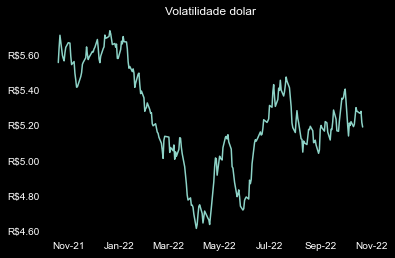

In [158]:
# Plotando Gráfico
fig,ax = plt.subplots()
plt.style.use ('dark_background')
ax.grid(False)
plt.title ('Volatilidade dolar')

# Configurando dados
ax.plot(dolar.index,dolar['USD'])
ax.yaxis.set_major_formatter('R${x:1.2f}') # Formatando o eixo Y com (R$ e pontos)

# Formatando Datas
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)

# Salvando Figura
plt.savefig('dolar_volati.png',dpi=300)
plt.show()